In [1]:
!git clone https://github.com/mjoudy/yolo_deepsee.git
%cd yolo_deepsee/
%ls

Cloning into 'yolo_deepsee'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 39 (delta 8), reused 25 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 39.85 KiB | 5.69 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/yolo_deepsee
batch_selection.ipynb      colab_train.ipynb  training_pipeline.ipynb
batch_selection_script.py  __pycache__/       yolo_preparation.py
colab_data.ipynb           test.ipynb


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [1]:
from batch_selection_script import create_batch_dataset, create_dataset_yaml

import os
from ultralytics import YOLO

In [2]:
results = create_batch_dataset(N_images=10, classes=["Buccinid snail"], base_path=os.getcwd(), images_folder="images", csv_name="raw-dataset.csv")
dataset_yaml = create_dataset_yaml("10", results['classes'], base_path=os.getcwd())

🔧 Configuration:
   - Base path: /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee
   - Images folder: /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/images
   - CSV file: /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/raw-dataset.csv
   - Classes: ['Buccinid snail']
   - Number of images: 10
   - Output folders: /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/images_10, /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/labels_10

✅ Loaded 235323 annotations from /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/raw-dataset.csv
✅ Filtered to 98282 annotations for classes: ['Buccinid snail']
✅ Found 3304 unique images with annotations
🎯 Randomly selecting 10 out of 3304 images
🎯 Selected 10 images

📁 Processed 10/10 images...

✅ Successfully processed 10 images and annotations!
📂 Output folders:
   - Images: /home/mjoudy/Documents/

In [3]:
# === YOUR MODIFIED CODE ===
EXP_NAME = "exp_10"
EXP_DIR = os.path.join(".", EXP_NAME)  # Changed from OUTPUT_DIR to current directory
WEIGHT_DIR = os.path.join(EXP_DIR, "weights")
LAST_PATH = os.path.join(WEIGHT_DIR, "last.pt")

if os.path.exists(LAST_PATH):
    print(f"✅ Found last checkpoint at {LAST_PATH}. Resuming training.")
    model = YOLO(LAST_PATH)
    resume_flag = True
else:
    print("🆕 No checkpoint found. Starting from scratch with yolov8n.yaml.")
    model = YOLO("yolov8n.yaml")
    resume_flag = False

🆕 No checkpoint found. Starting from scratch with yolov8n.yaml.


In [4]:
results = model.train(
    data=dataset_yaml,       # Path to dataset
    epochs=2,
    imgsz=640,
    batch=16,
    name="exp1",
    project="runs/train",
    save=True,
    resume=False
)

New https://pypi.org/project/ultralytics/8.3.171 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.153 🚀 Python-3.10.14 torch-2.4.1.post100 CPU (Intel Core(TM) i5-8365U 1.60GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/10_dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, m

/home/mjoudy/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/images_10.cache... 0 images, 10 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

WARNING ⚠️ Labels are missing or empty in /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/images_10.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2441.6±140.7 MB/s, size: 180.4 KB)



val: Scanning /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/images_10.cache... 0 images, 10 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]

WARNING ⚠️ Labels are missing or empty in /home/mjoudy/Documents/codes/galaxy_project/deep_see/training/yolo_deepsee/images_10.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/train/exp15/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
MLflow: logging run_id(73d38307a91b4db5947fdba801c3c539) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/train/exp15
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]

: 

Tuner: Initialized Tuner instance with 'tune_dir=hpo_yolo/hpo_exp4'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'cutmix': 0.0, 'copy_paste': 0.0}
ERROR ❌ training failure for hyperparameter tuning iteration 1
Command '['/usr/bin/python3', '-m', 'ultralytics.cfg.__init__', 'train', 'task=detect', 'mode=train', 'model=yolov8n.yaml', 'data=dataset_yaml', 'epochs=10', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=True', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=hpo_yolo', 'name=None', 'exist_ok=False', 'pretra

KeyboardInterrupt: 

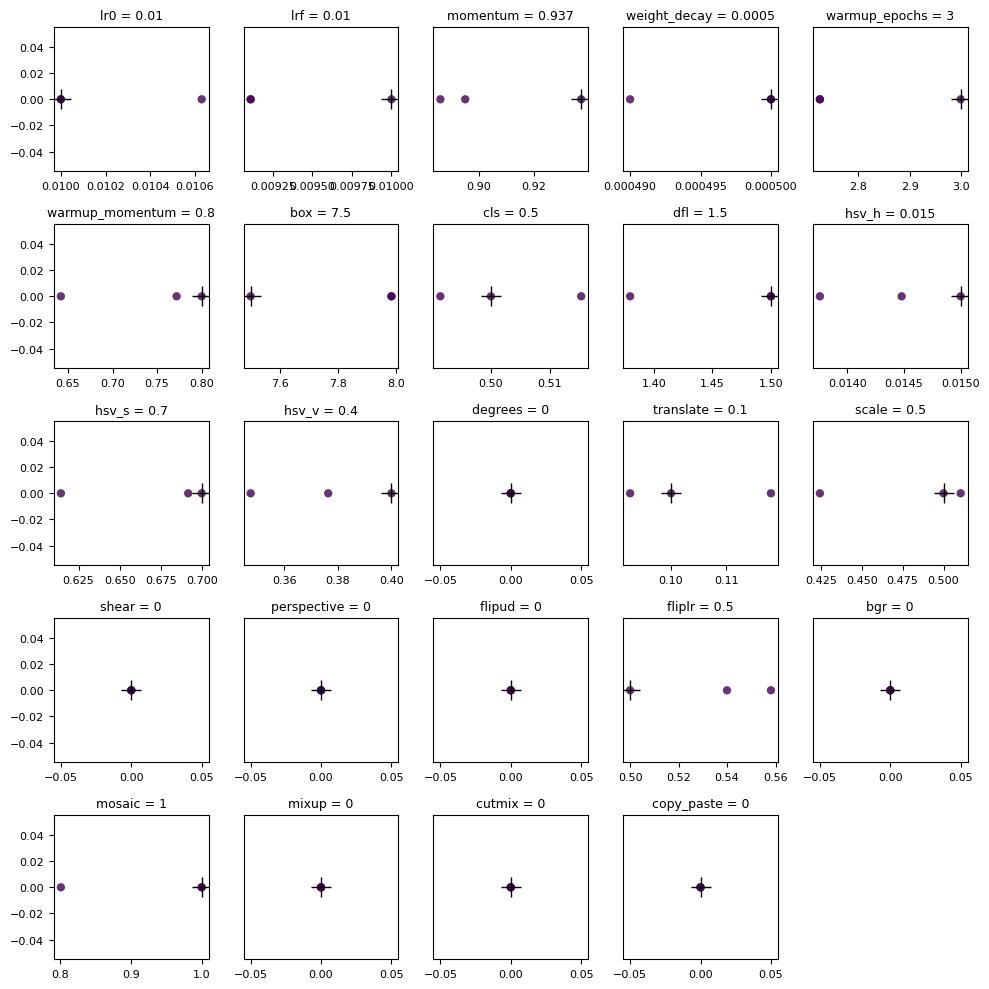

In [21]:
results = model.tune(
    data="dataset_yaml",   # ensure this YAML is valid
    epochs=10,
    imgsz=640,
    batch=16,
    iterations=10,             # reduce for testing
    project="hpo_yolo",
    name="hpo_exp",
    optimizer="GA",            # genetic algorithm
    val=True,
    plots=True,
)